## Projet ICAP - FALKNER Florian
#### Master SDSC - Université de Strasbourg

Objectif: Détection d'événements anormaux dans les puits de pétrole

#### 1. Data Analysis

   Voir la partie 1 du projet. Ce que j'ai fait en plus c'est d'extraire la class y (celle à prédire) dans un dataframe à part et ensuite un dropout des colonnes que je n'ai pas besoin. Après le dropout, j'ai directement fait une normalisation des données par colonne en utilisant une fonction. Après la transformation, j'ai aussi fait un onehot pour y_train et y_test. Pour les 0 ça sera 1.0.0, les 8 -> 0.1.0 et les 108 -> 0.0.1

#### 2. Data transformation

   Pour la transformation des données, j'ai créé un petit bloc de codes pour transformer les données brutes pour avoir le même format que vos données transformées. Pour faire ceci, j'ai analysé vos fichiers Excels et fait quelques calculs pour retrouver le bon format. J'ai pu comprendre que le format se fait sur 25 timestep qui sont rangés dans un array. Donc la ligne 0 jusqu'à la ligne 24 seraient rangées dans un array et ensuite on fait +1 pour prendre les lignes 1 jusqu'à 25 et ainsi de suite. Chaque nouveau "bloc" de timestep est rangé dans un array différent. À la fin tous les arrays se retrouvent dans un grand array qui englobe tous les autres. Je convertis le dataset en numpy array, je prends la taille du dataset, je mets 25 pour le nombre de timestep, deux compteurs et deux listes. La listeX sera celle qui contiendra tous les autres array. 
   
J'ai 2 boucles while, la 1ère vérifie s'il est possible de prendre les 25 prochains timestep. Si cela est bon, la 2ème boucle vérifie si le compteur (compteur de timestep) n'est pas égal au nombre de timestep qu'on veut (25). Si ça passe, je concatène le 1er timestep dans la liste1, ensuite 2ème timestep, 3ème, 4ème et ainsi de suite jusqu'à le compteur soit égal au nombre de timestep (25). Si c'est le cas, on incrémente le 2ème compteur, le 1er compteur est remis à 0 et on ajoute les 25 timestep (125 chiffres) de la list1 dans le grand array listX et on vide la liste1 pour qu'il soit utilisable pour sauvegarder les 25 prochains timestep. Il faut savoir que les 25 derniers timestep ne seront pas pris car sinon cela dépasse la limite avec les y, on aura donc 26974 lignes et non 26999.
   
   Pour le dataset y, j'extrais à partir de la longueur du timestep (25ème en partant de 0, ce qui représente la ligne 26) jusqu'à la longueur de la listeX + timestep. Ce qui nous donne aussi 26974 lignes. Donc pour la targetClasse on enlève les 25 premiers chiffres et dans celle de listX, on enlève les 25 derniers. Pour finir, je split les données pour l'entrainement et le test. Le code se trouve dans le bloc 3.
   

#### 3. Model set up

   J'ai choisi d'utiliser 2 Conv1D avec une taille de noyau différente mais croissante. Je voulais pas en mettre trop pour ne pas avoir un modèle trop profond. Chaque couche de convolution est suivie par une couche de MaxPooling de taille 3. Maxpooling sert à réduire progressivement la taille spatiale de la représentation tout en conservant les informations les plus importantes pour les couches suivantes et réduit le nombre de paramètres. Ils ont une taille de 3. La taille du noyau est de 5 pour les Conv1D, pour qu'il ait la possibilité de se déplacer dans la matrice.
   
   Ensuite, j'ai mis une couche Flatten qui est obligatoire pour mettre les données en 1D sinon ça ne fonctionne pas.
   Pour finir, j'ai 4 couches Dense (Fully-connected) dont une (la dernière) qui est à 3 car on peut avoir que 3 sorties, car les onehot font une taille de 3. Ces couches sont utiles pour la classification et je me suis dit que 4 Dense avec des filtres qui sont décroissants devraient suffire.  Pour toutes les couches sauf la dernière j'ai utilisé l'activation relu pour activer les différentes unités. Pour la dernière, j'ai utilisé sigmoid car on doit avoir un résultat entre 0 et 1 à cause des onehot.
   
   Le modèle n'est pas grand, il a ~120.000 paramètres. Je voulais un modèle qui soit cohérent et pas complexe. 

#### 4. Model training and evaluation

   J'ai utilisé un EarlyStopping sur val_loss, le mode minimize et une patience de 4. Je trouve que c'est mieux d'utiliser un EarlyStopping sur les données du jeu de validation. J'utilise le mode min car je veux minimiser le validation loss. L'entrainement s'arrête lorsque la mesure de performance choisie cesse de s'améliorer. Je pense que patience = 4 est suffisant pour ce modèle qui a une epoch de 15.
   
   Ensuite, je compile le modèle en utilisant adam et le loss categorical_crossentropy. J'ai utlisé adam car en entrainent le modèle cela met moins de temps et est plus efficace. J'ai utilisé ce loss car il est fait pour les probabilités et il est fait pour calculer l'erreur s'il y a plus que 2 label, ce qui est le cas. 
   
   L'entrainement du modèle se fait sur les x_train et sur les y_train onehot et ça sur 15 epochs. J'ai décidé de ne pas mettre plus car j'ai des bons résultats avec 15 donc je ne vois pas l'utilité de l'augmenter. Comme demandé, j'ai ajouté une validation_split de 0.2.
  
  En faisant un print du résumé du modèle, on peut voir le résumé du modèle mais aussi le nombre de paramètres. On peut voir le loss et la précision sur l'entrainement et sur la validation. En ayant mis verbose=1 à EarlyStopping, on peut voir à quelle epoch il s'est arrêté. J'ai aussi ajouté un plot qui affiche la précision sur les tests et training du modèle par rapport au epochs. On peut voir que le loss sur l'entrainement décroit toujours, pareil pour le loss sur les données de validation. Ceci nous indique qu'il n'y a pas d'overfit. On remarque aussi que la précision sur les deux côtés augmente et ne reste pas bloquée ou diminue.  
  
  Quand j'évalue le modèle sur x_test et y_test_ohe, la précision du modèle est très bonne. La précision est presque toujours entre 95% et 99%. Ceci nous indique que le modèle prédira très bien. Ensuite, j'enregistre les prédictions faite sur x_test dans la variable test. Je reconvertis les variables y_test_ohe et test en non onehot pour pourvoir les utiliser dans le random des 1000 instances et pour avoir un affichage correct dans la matrice de confusion.
  
  J'ai créé 1000 random instance comme demandé dans le projet. Je prends un nombre aléatoire entre 0 et la longueur de la variable test (prédictions faite sur x_test) et ensuite je prends le timestep correspondant au chiffre et j'enregistre le timstep x dans test_random et le y dans y_random.
  
  Le dernier bloc c'est pour la matrice de confusion. Comme le modèle apprend bien, les résultats sont très précis sauf parfois pour quelques labels mais c'est qu'une petite quantité. En lançant plusieurs fois l'évaluation j'ai pu remarquer qu'il prédit les 0 à 99-100% justes. C'est seulement pour les 8 et 108 où il ne prédit pas à 100% mais plutôt 95-99% justes. 
  
  Je peux conclure que le modèle apprend et prédit bien sans être lourd et complexe, il atteint l'objectif.

In [1]:
# Package
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Fonction pour la normalisation
def scale_linear_bycolumn(rawpoints, high = 1.0, low = 0.0):
    mins = np.min(rawpoints, axis = 0)
    maxs = np.max(rawpoints, axis = 0)
    rnge = maxs - mins
    return high - (((high - low) * (maxs - rawpoints)) / rnge)

In [3]:
# Chargement des données et dropout des colonnes
df = pd.read_csv('donnees_brutes.csv')
targetClass = df['class']
df = df.drop(['timestamp', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL', 'class'], axis = 1)

# Normalisation des données
df = scale_linear_bycolumn(df)


# Transformation des données
df = df.to_numpy()
datasetLength = len(df)
timestep = 25

counter = 0
i = 0

list1 = []
listX = []

while(timestep < datasetLength):
    while(counter != timestep):
        list1.append(df[counter+i])
        counter += 1
    counter = 0
    i += 1

    listX.append(list1)
    list1 = []
    
    datasetLength -= 1
    
targetClass = targetClass[timestep:len(listX)+timestep]
targetClass = targetClass.to_numpy()
listX = np.array(listX)

# Training/Test split
x_train, x_test, y_train, y_test = train_test_split(listX, targetClass)

In [4]:
# OneHot de y_train et y_test
onehot_encoder = OneHotEncoder(sparse = False)
y_train_ohe = onehot_encoder.fit_transform(y_train.reshape(-1, 1))

onehot_encoder = OneHotEncoder(sparse = False)
y_test_ohe = onehot_encoder.fit_transform(y_test.reshape(-1, 1))

# 0 -> 1.0.0
# 8 -> 0.1.0
# 108 -> 0.0.1 

In [5]:
# Architecture du modèle
model = Sequential()
model.add(Conv1D(filters = 64, kernel_size = 5, activation = 'relu', input_shape = (25, 5)))
model.add(MaxPooling1D(pool_size = 3))
model.add(Conv1D(filters = 128, kernel_size = 5, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 3))

model.add(Flatten())

model.add(Dense(265, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

# Couche sortie
model.add(Dense(3, activation = 'sigmoid'))

# Early Stopping
estopping = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 4, verbose = 1)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x = x_train, y = y_train_ohe, epochs = 15, validation_split = 0.2, verbose = 2, callbacks=[estopping])

print(model.summary())

Epoch 1/15
506/506 - 5s - loss: 0.1716 - accuracy: 0.9172 - val_loss: 0.1327 - val_accuracy: 0.9471
Epoch 2/15
506/506 - 2s - loss: 0.1109 - accuracy: 0.9519 - val_loss: 0.1124 - val_accuracy: 0.9545
Epoch 3/15
506/506 - 2s - loss: 0.0987 - accuracy: 0.9582 - val_loss: 0.0891 - val_accuracy: 0.9597
Epoch 4/15
506/506 - 2s - loss: 0.0862 - accuracy: 0.9665 - val_loss: 0.1166 - val_accuracy: 0.9605
Epoch 5/15
506/506 - 2s - loss: 0.0818 - accuracy: 0.9702 - val_loss: 0.0671 - val_accuracy: 0.9773
Epoch 6/15
506/506 - 2s - loss: 0.0665 - accuracy: 0.9752 - val_loss: 0.0548 - val_accuracy: 0.9807
Epoch 7/15
506/506 - 2s - loss: 0.0901 - accuracy: 0.9681 - val_loss: 0.0922 - val_accuracy: 0.9654
Epoch 8/15
506/506 - 2s - loss: 0.0758 - accuracy: 0.9695 - val_loss: 0.1027 - val_accuracy: 0.9553
Epoch 9/15
506/506 - 2s - loss: 0.0784 - accuracy: 0.9663 - val_loss: 0.0494 - val_accuracy: 0.9834
Epoch 10/15
506/506 - 2s - loss: 0.0650 - accuracy: 0.9777 - val_loss: 0.1015 - val_accuracy: 0.9666

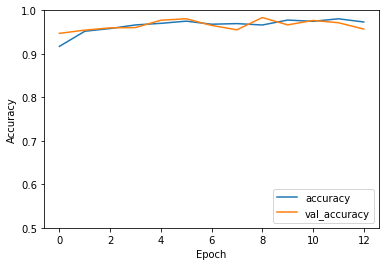

In [6]:
# Plot Training/Test
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [7]:
# Evaluation du modèle
model.evaluate(x = x_test, y = y_test_ohe, verbose = 1)

211/211 [==============================] - 0s 2ms/step - loss: 0.1303 - accuracy: 0.9533


[0.13026398420333862, 0.9532918334007263]

In [8]:
# Model predict
test = model.predict(x_test)

# Inverser OneHot
test = onehot_encoder.inverse_transform(test).ravel()
y_test_No_ohe = onehot_encoder.inverse_transform(y_test_ohe).ravel()

# Création de 1000 random samples
test_random = np.array([])
y_random = np.array([])
for i in range(1000):
    r = random.randint(0, len(test))
    test_random = np.insert(test_random, len(test_random), test[r])
    y_random = np.insert(y_random, len(y_random), y_test_No_ohe[r])

In [9]:
# Matrice de confusion
data = {'y_Actual':    y_random,
        'y_Predicted': test_random}

df = pd.DataFrame(data, columns = ['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames = ['Actual'], colnames = ['Predicted'])
print(confusion_matrix)

Predicted  0.0    8.0    108.0
Actual                        
0.0           60      0      0
8.0            0    581      0
108.0         21     26    312
